In [17]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import random

Perpustakaan Keras adalah perpustakaan pembelajaran mendalam yang harus kita gunakan ketika kita akan melatih model kita. Padat adalah operasi linier di mana setiap input terhubung ke setiap output dengan bobot. Adam adalah pengoptimal yang akan kita gunakan di bagian lapisan kita.

In [20]:
#import 60000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
#mengecek jumlah dataset nya. ada 60000 dataset untuk training dan 10000 untuk valisadi
print(len(train_data))
print(len(test_data))

60000
10000


In [52]:
print(len(train_data))
print(len(test_data))

60000
10000


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [63]:
train_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [62]:
test_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

4


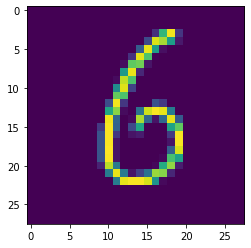

In [55]:
import matplotlib.pyplot as plt
plt.imshow(train_data[18])
print(train_labels[20])

pernyataan cetak pertama kita memiliki hasil seperti (60000, 28, 28). Parameter pertama dalam tuple menunjukkan berapa banyak gambar yang kita miliki. Parameter ke-2 dan ke-3 merupakan nilai piksel dari x ke y (28x28). ketika kita ingin melatih model, gambar harus dalam format 28x28 yang berarti tidak boleh memiliki kedalaman gambar (gambar skala abu-abu). Jika kita memiliki gambar rgb, kita harus membentuknya kembali ke format skala abu-abu.

In [22]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

validasi input gambar

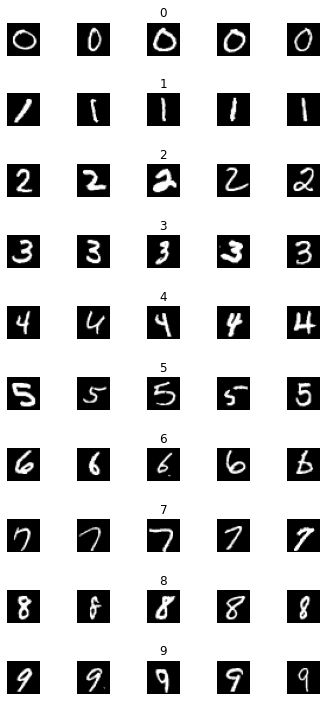

In [23]:

num_of_samples = []

cols = 5 #We will select 5 random images
num_of_classes = 10 #each digit total: 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray')) 
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))


mengambil contoh ramdom 5 dari setiap angka

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


(0, 0.5, 'Number of images')

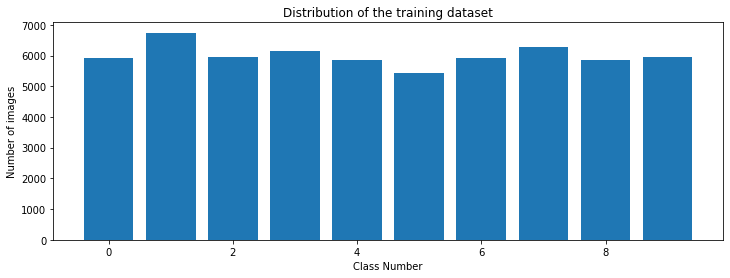

In [24]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

(0, 0.5, 'Number of images')

banyaknya jumlah nomor pada data dimasukkan kedalam bentuk diagram

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

 menggunakan fungsi to_categorical dikarenakan memiliki hasih muticlass dengan nilai 0-9 (10)

In [26]:
#masing2 gambar dibagi dengan 255 intesitasnya
X_train = X_train/255 
X_test = X_test/255
#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)

(60000, 784)


Karena perkalian matriks kita harus mengubah bentuk array. (AxB * BxC = AxC) Jadi kita akan membentuk array 28x28 menjadi 1x784.

In [27]:

def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels, #num_pixels: 784
                  activation = 'relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), #lr: learning rate
                loss='categorical_crossentropy', #loss function
               metrics=['accuracy'])
  return model

membuat hidden layer RELU untuk hasil yang lebih bagus

In [28]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:

history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, 
                    verbose=1, shuffle=1)


Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.4989 - accuracy: 0.8469 - val_loss: 0.2496 - val_accuracy: 0.9308
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9224 - val_loss: 0.2165 - val_accuracy: 0.9365
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2270 - accuracy: 0.9339 - val_loss: 0.1919 - val_accuracy: 0.9452
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2047 - accuracy: 0.9404 - val_loss: 0.1728 - val_accuracy: 0.9503
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.1976 - accuracy: 0.9424 - val_loss: 0.1747 - val_accuracy: 0.9473
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.1890 - accuracy: 0.9436 - val_loss: 0.1770 - val_accuracy: 0.9500
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.1815 - accuracy: 0.9460 - val_loss: 0.1777 - val_accuracy: 0.9483
Epoch 

kita dapat melihat hasil dari pembuatan hidden layer tadi. Kita dapat melihat lapisan kita dengan berapa banyak parameter yang memiliki lapisan. Sekarang kita bisa berlatih dan melihat hasilnya.

Text(0.5, 0, 'epoch')

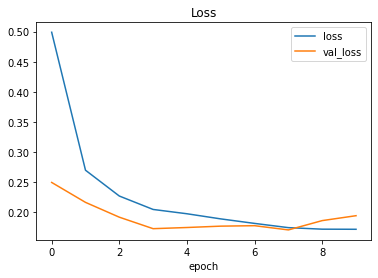

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

model yang telah disimpan dalam histrori terdahulu dapat dilihat seperti diatas

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

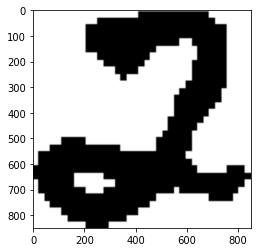

In [65]:

import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)

plt.imshow(img)


sekarang pelatihan model dengan gambar apa saja, dengan mendapatkan gambar dari url

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

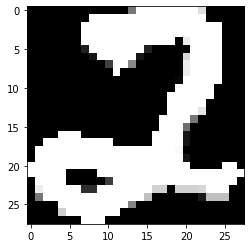

In [76]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28 ))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

number telah menjadi greyscale


In [51]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

mengecek jumlah data setiap bagian

melihat salah satu data

In [61]:
#proses normalisasi dimana data dibagi dengan 255
#proses train lebih cepat dan efisien
train_data = train_data/255
test_data = test_data/255